In [126]:
# 데이터 로딩
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings # 경고 무시
warnings.filterwarnings('ignore') 


In [127]:
# 학습 데이터, 테스트 데이터를 로딩 => DataFrame으로 만들거임
test = pd.read_csv('../data/titanic_test.csv')
train = pd.read_csv('../data/titanic_train.csv')

2. Exploratory data analysis (EDA: 탐색적 데이터 분석)
- 탐색적 데이터 분석 : 데이터 탐색해서 데이터 구조와 의미 파악

In [128]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
train.info()
# Pclass는 서수형 데이터 => 카테고리면서 순서가 있는 데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerId : 고객 번호	
- Survived : 생존 여부, 0 = No, 1 = Yes 
- Pclass : Ticket Class 1, 1 = 1st, 2 = 2nd, 3 = 3rd
- Name : 이름 => 결혼 여부, 가족 여부 확인
- Sex : 남, 여
- Age : 나이
- SibSp	: 형제, 배우자 인원 수
- Parch	: 부모, 자식 인원 수
- Ticket : Ticket Number
- Fare : 금액
- Cabin	: 방 번호
- Embarked : 선착장 => port가 3군데 : C = Cherbourg, Q = Queenstown, S = Southampton

In [130]:
# 누락 값 처리
# missing values features details
def missing_table():
    global out_train,out_test,target,miss_train,miss_test,missing_train,missing_test
    miss_train=out_train.copy()
    miss_test=out_test.copy()
    missing_train,missing_test=pd.DataFrame(),pd.DataFrame()
    # total 
    missing_train['Total'] = miss_train.isnull().sum().sort_values(ascending = False)
    missing_test['Total'] = miss_test.isnull().sum().sort_values(ascending = False)
    # percentage of missing values
    missing_train['Percentage of Missing Values'] = (miss_train.isnull().mean()*100).sort_values(ascending = False)   
    missing_test['Percentage of Missing Values'] = (miss_test.isnull().mean()*100).sort_values(ascending = False)   
    # type
    missing_train['Type'] = miss_train[missing_train.index].dtypes
    missing_test['Type'] = miss_test[missing_test.index].dtypes
    
    missing_train=missing_train[missing_train['Percentage of Missing Values']>0]
    missing_test=missing_test[missing_test['Percentage of Missing Values']>0]

In [131]:
# 데이터 구조
train.shape, test.shape
# train할 데이터 수는 891개, test(제출해야할) 데이터 수는 418개

((891, 12), (418, 11))

In [132]:
# Name 처리
for i in [train,test]:
    i["Title"]=i["Name"].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
    i["Title"].unique()
    i["Title"]=i["Title"].replace([" Don"," Rev"," Dr"," Major"," Lady"," Sir"," Col"," Capt"," the Countess"," Jonkheer"],"Rare")
    i["Title"]=i["Title"].replace([" Mlle", " Ms"]," Miss")
    i["Title"]=i["Title"].replace([" Mme"," Mrs"]," Mr")

In [133]:
target='Survived'
x_train,x_test,y_train,y_test=train_test_split(train.drop(target,axis=1),train[target],test_size=.3,random_state=0)
df_train=pd.concat([x_train,y_train],axis=1)
df_test=pd.concat([x_test,y_test],axis=1)
# drop PassengerId, Name, Ticket => 사용 안 할 거임
for i in [df_train,df_test,test]:
    i.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [134]:
print('Train')
print(df_train.nunique())
print('Test')
print(df_test.nunique())

Train
Pclass        3
Sex           2
Age          83
SibSp         7
Parch         7
Fare        216
Cabin       120
Embarked      3
Title         4
Survived      2
dtype: int64
Test
Pclass        3
Sex           2
Age          64
SibSp         6
Parch         5
Fare        134
Cabin        48
Embarked      3
Title         4
Survived      2
dtype: int64


In [135]:
categorical_features=[i for i in df_train.columns if df_train[i].dtype=='O']
numerical_features=[i for i in df_train.columns if df_train[i].dtype!='O']
print('categorical_features : ',categorical_features,'\nnumerical_features : ',numerical_features)

categorical_features :  ['Sex', 'Cabin', 'Embarked', 'Title'] 
numerical_features :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


In [136]:
def barplot(feature,df):
    survived=df[df["Survived"]==1][feature].value_counts()
    dead=df[df["Survived"]==0][feature].value_counts()
    df1=pd.DataFrame([survived,dead])
    df1.index=["Survived","Dead"]
    df1.plot(kind="bar",figsize=(10,5))
    plt.title(feature)

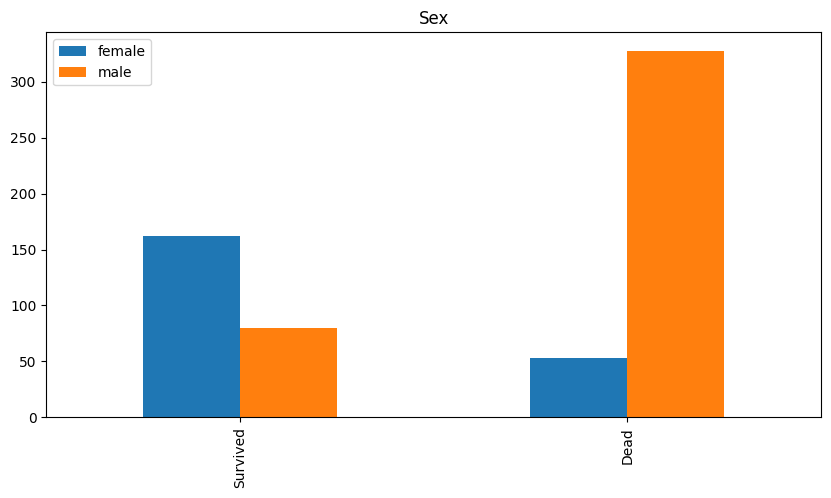

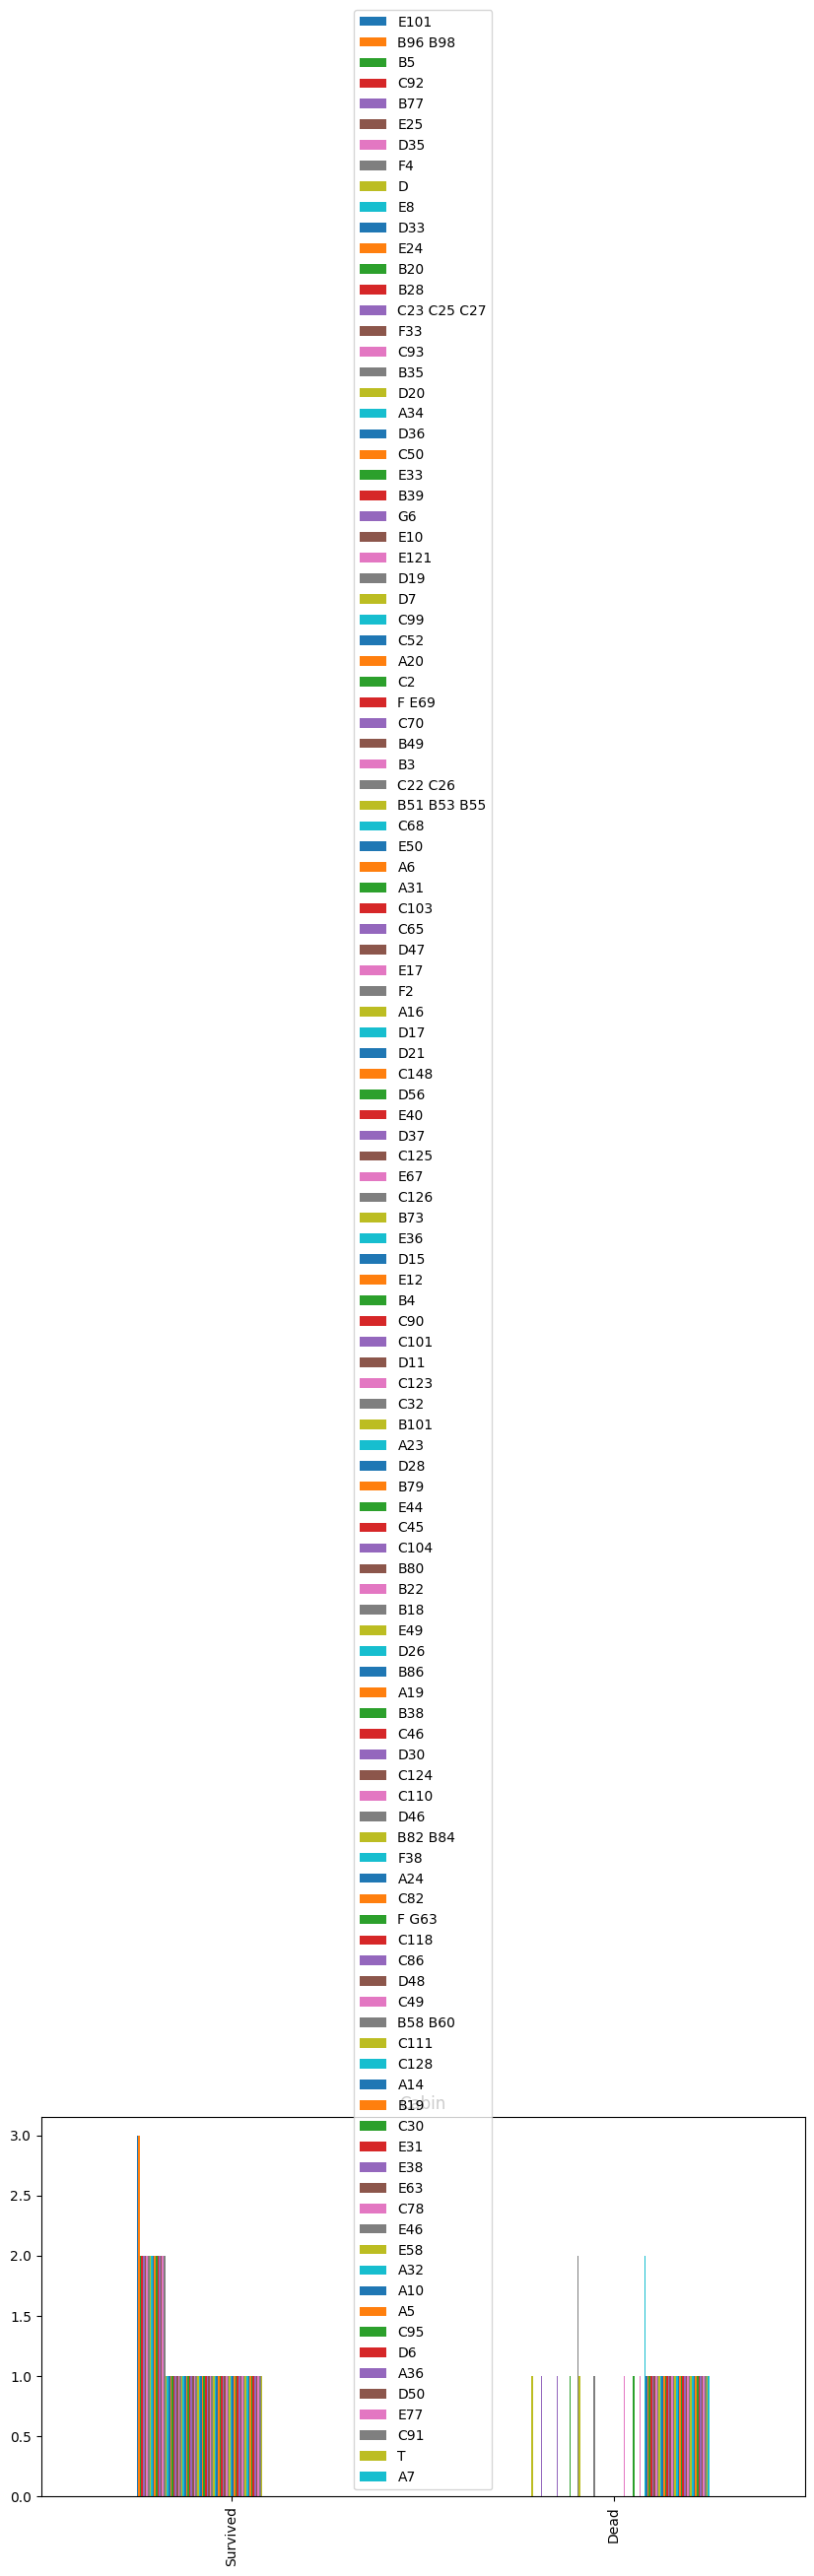

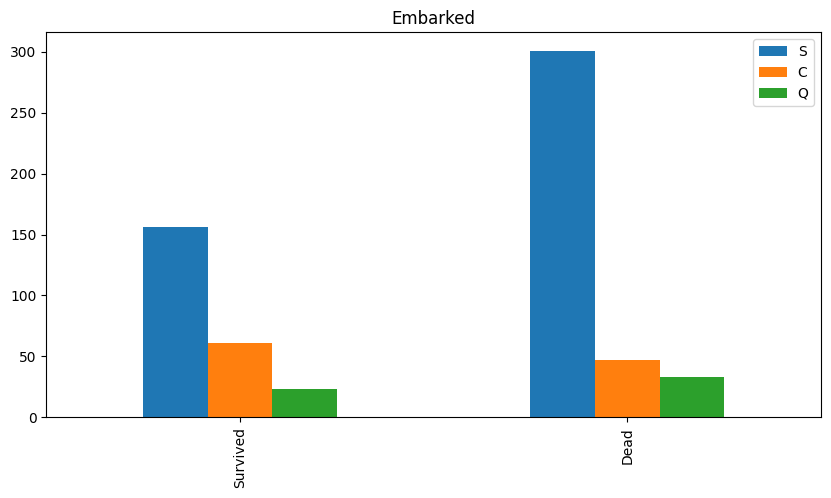

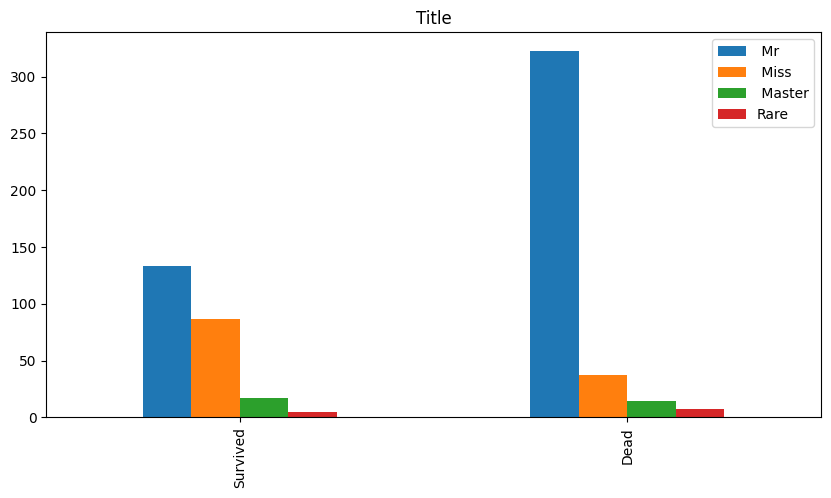

In [137]:
# Categorical Features Graph
for i in categorical_features:
    barplot(i,df_train)

In [138]:
for i in [df_train,df_test]:
    print(i[target].value_counts())

0    381
1    242
Name: Survived, dtype: int64
0    168
1    100
Name: Survived, dtype: int64


In [139]:
df_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Title', 'Survived'],
      dtype='object')

None
None
None
None
None
None
None
None


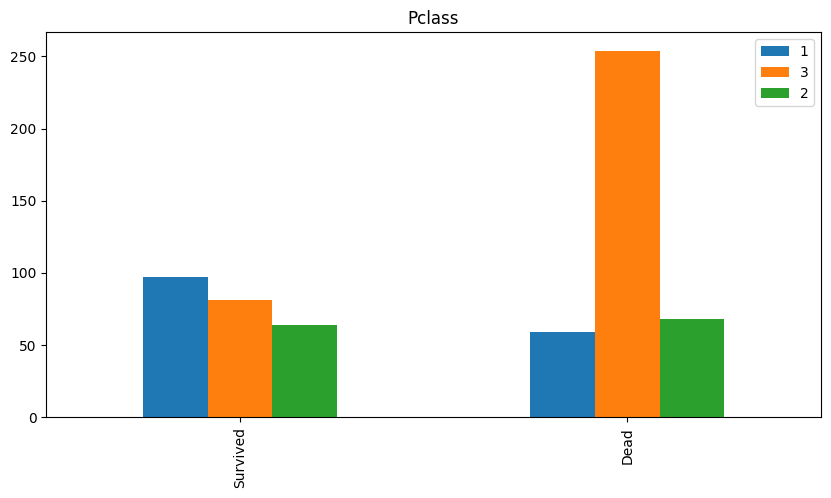

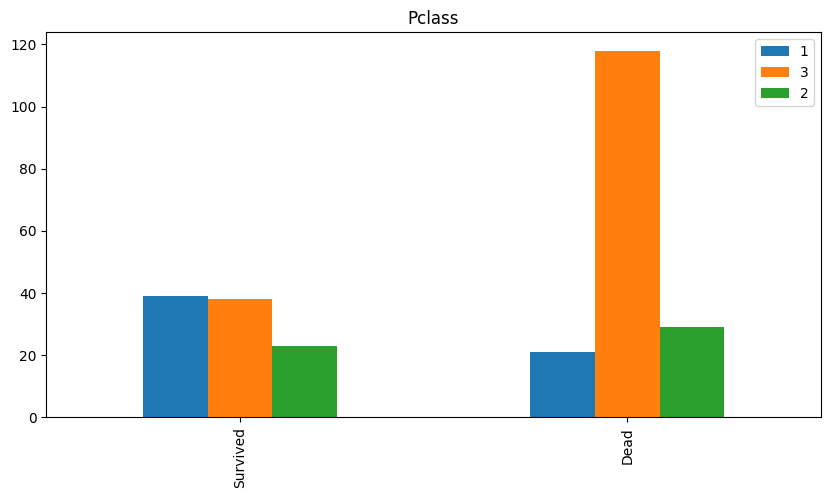

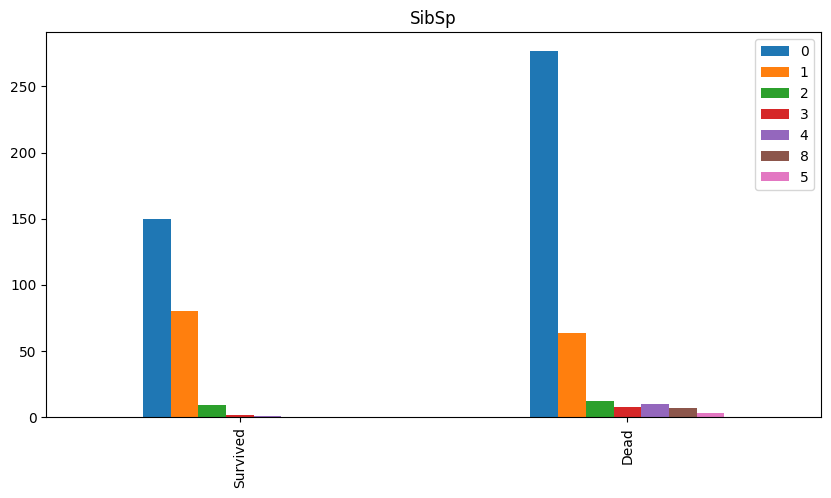

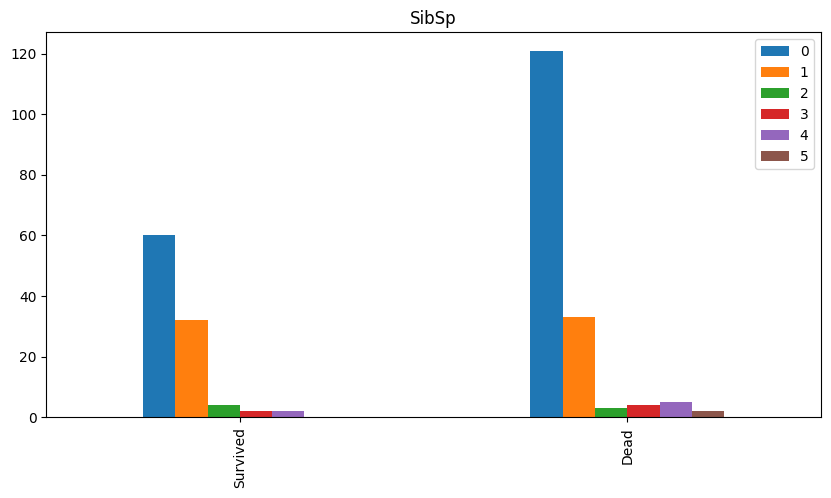

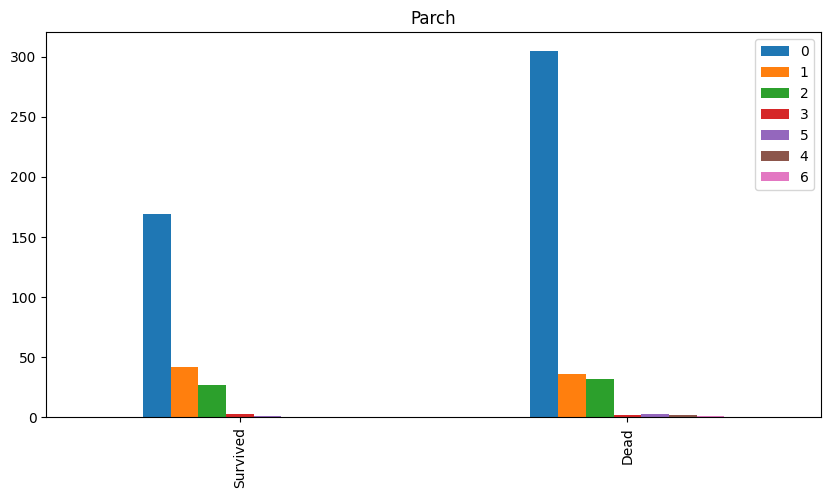

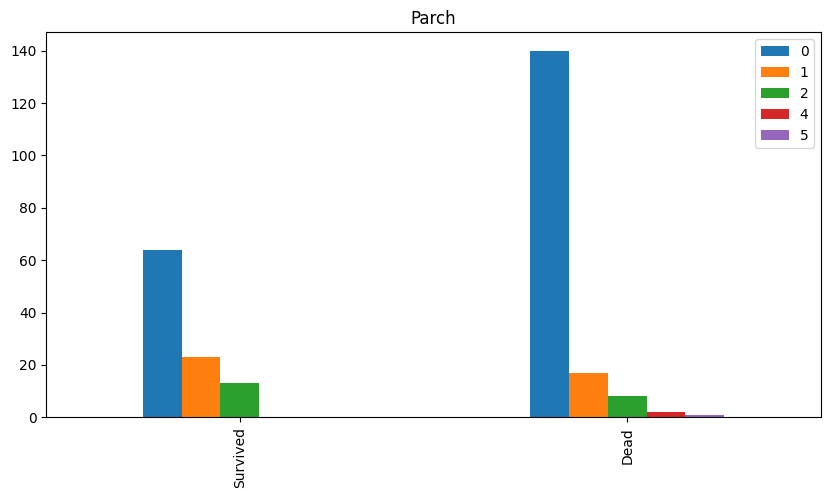

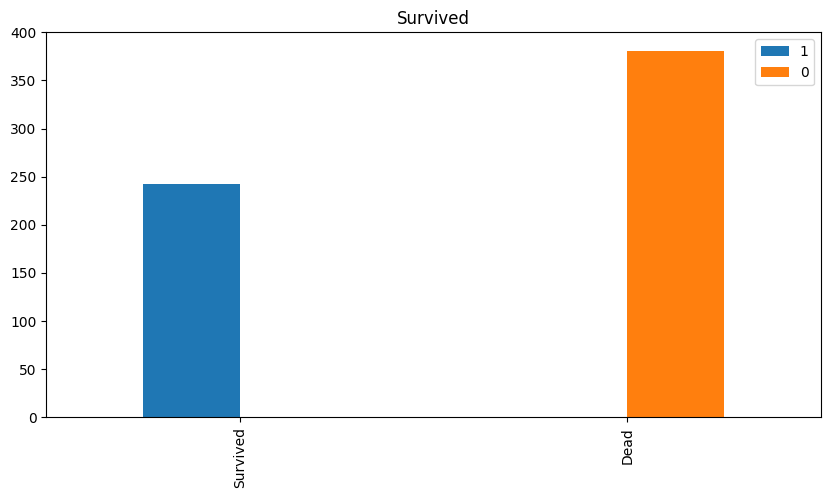

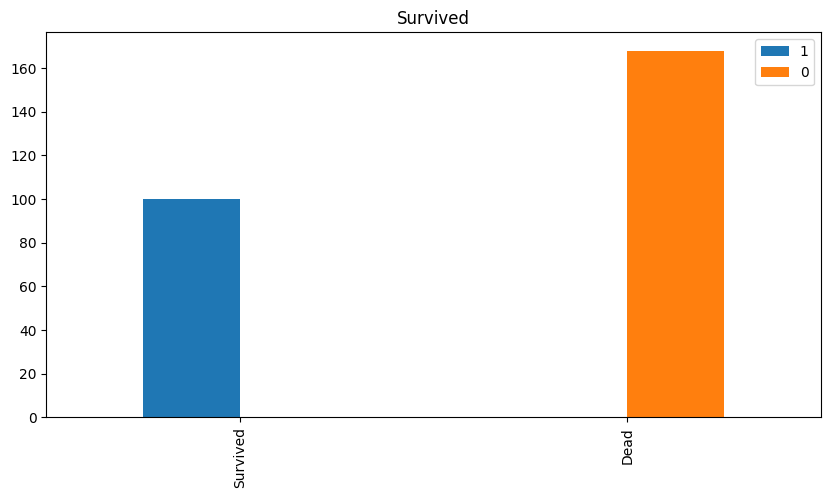

In [140]:
# Discrete Features 
discrete_features=[i for i in numerical_features if df_train[i].nunique()<=10 and target]
for i in discrete_features:
    for j in [df_train,df_test]:    
        print(barplot(i,j))

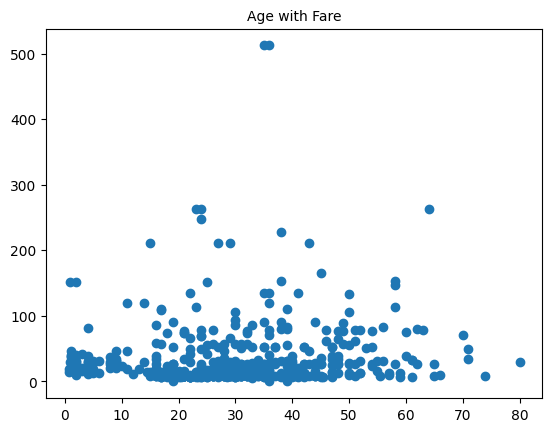

In [141]:
continuous_features=[i for i in numerical_features if df_train[i].nunique()>10]

plt.scatter(x=df_train['Age'],y=df_train['Fare'])
plt.title('Age with Fare',fontsize=10)
plt.show()

In [142]:
from scipy.stats.mstats import winsorize # 지정된 수의 극한값을 더 작은 데이터값으로 대체

In [143]:
for j in [df_train,df_test,test]:
    for i in continuous_features:
        j[i]=winsorize(j[i], limits=(.1,.1))

In [144]:
'''
for j in [df_train,df_test,test]:
    count=1
    for i in continuous_features:
        plt.subplot(2,2,count)
        sns.boxplot(j[i])
        plt.title(i,fontsize=15)
        count+=1
    plt.show()
'''

'\nfor j in [df_train,df_test,test]:\n    count=1\n    for i in continuous_features:\n        plt.subplot(2,2,count)\n        sns.boxplot(j[i])\n        plt.title(i,fontsize=15)\n        count+=1\n    plt.show()\n'

In [145]:
# 복사본
df_train_bckup=df_train.copy()
df_test_bckup=df_test.copy()

In [146]:
for i in discrete_features:
    for j in [df_train,df_test]:
        print(j[i].unique())
        print(i,'feature null 값 : ',j[i].isnull().sum())

[1 3 2]
Pclass feature null 값 :  0
[3 1 2]
Pclass feature null 값 :  0
[0 1 5 3 4 8 2]
SibSp feature null 값 :  0
[0 4 1 3 2 5]
SibSp feature null 값 :  0
[0 2 1 5 6 4 3]
Parch feature null 값 :  0
[0 1 2 4 5]
Parch feature null 값 :  0
[1 0]
Survived feature null 값 :  0
[0 1]
Survived feature null 값 :  0


In [147]:
for j in [df_train,df_test,test]:
    print(j['Title'].unique())
    print('Title feature null 값 : ',j['Title'].isnull().sum())

[' Mr' ' Master' ' Miss' 'Rare']
Title feature null 값 :  0
[' Mr' ' Master' ' Miss' 'Rare']
Title feature null 값 :  0
[' Mr' ' Miss' ' Master' 'Rare' ' Dona']
Title feature null 값 :  0


In [148]:
# NaN 
# discrete features 
# Parch
def parch_treat(x):
    if x==0:
        return 3
    elif x in [1,2]:
        return 2
    else:
        return 1
# Pclass
def pclass_treat(x):
    if x==1:
        return 3
    elif x==2:
        return 2
    else:
        return 1
# Sibsp
def sibsp_treat(x):
    if x==0:
        return 3
    elif x in [1,2]:
        return 2
    else:
        return 1
# categorical features
# Title
def title_treat(x):
    if x==' Master':
        return 4
    elif x=='Rare':
        return 3
    elif x==' Miss':
        return 2
    elif x==' Mr':
        return 1
    else:
        return np.nan
# Embarked
def embarked_treat(x):
    if x=='C':
        return 3
    elif x=='S':
        return 2
    elif x=='Q':
        return 1
    else:
        return np.nan
# Sex
def sex_treat(x):
    if x=='female':
        return 2
    elif x=='male':
        return 1
    else:
        np.nan

In [149]:
for j in [df_train,df_test,test]:
    for i in range(0,len(j['Cabin'])):
        if(pd.notnull(j['Cabin'].iloc[i])):
            j['Cabin'].iloc[i]=j['Cabin'].iloc[i][0]

In [150]:
df_train.columns # shape 찍기

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Title', 'Survived'],
      dtype='object')

In [151]:
for j in [df_train,df_test,test]:
    j['Pclass']=j['Pclass'].apply(lambda x:parch_treat(x))
    j['SibSp']=j['SibSp'].apply(lambda x:pclass_treat(x))
    j['Parch']=j['Parch'].apply(lambda x:sibsp_treat(x))
    #categorical features
    j['Title']=j['Title'].apply(lambda x:title_treat(x))
    j['Embarked']=j['Embarked'].apply(lambda x:embarked_treat(x))
    j['Sex']=j['Sex'].apply(lambda x:sex_treat(x))

In [152]:
for i in categorical_features:
    print(i)
    for j in [df_train,df_test,test]:
        print(j[i].unique())

Sex
[1 2]
[1 2]
[1 2]
Cabin
['E' 'D' nan 'B' 'C' 'A' 'F' 'G' 'T']
[nan 'B' 'C' 'E' 'D' 'F' 'G' 'A']
[nan 'B' 'E' 'A' 'C' 'D' 'F' 'G']
Embarked
[ 2.  3.  1. nan]
[3 2 1]
[1 2 3]
Title
[1 4 2 3]
[1 4 2 3]
[ 1.  2.  4.  3. nan]


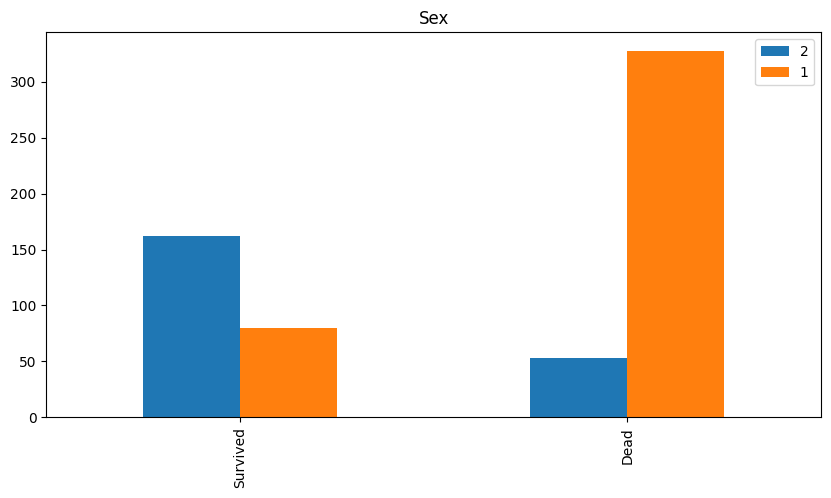

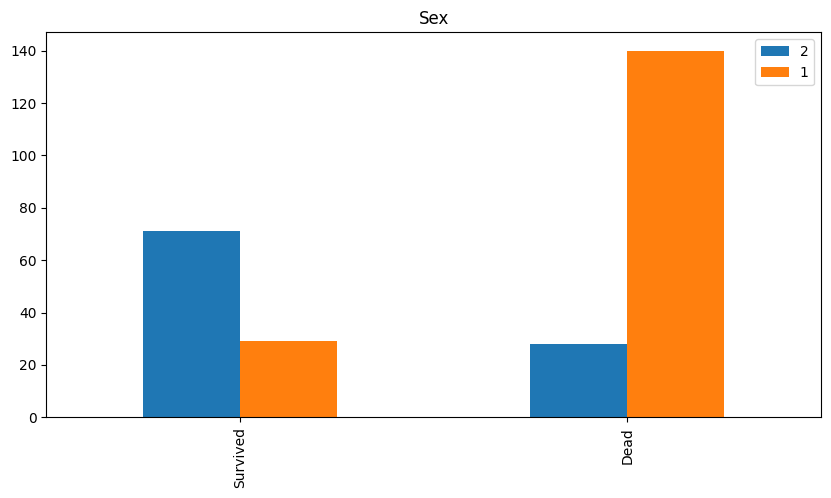

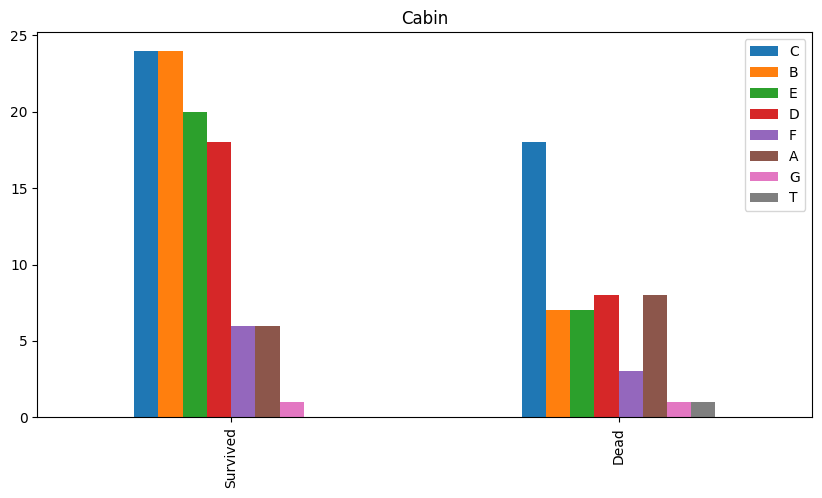

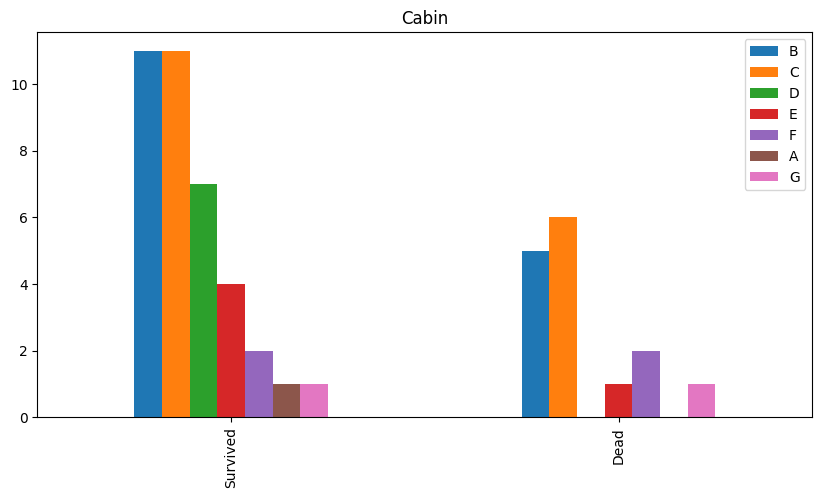

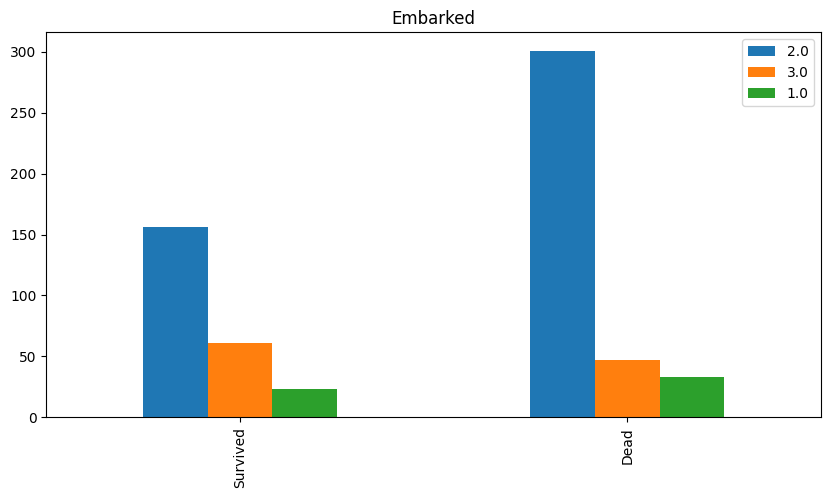

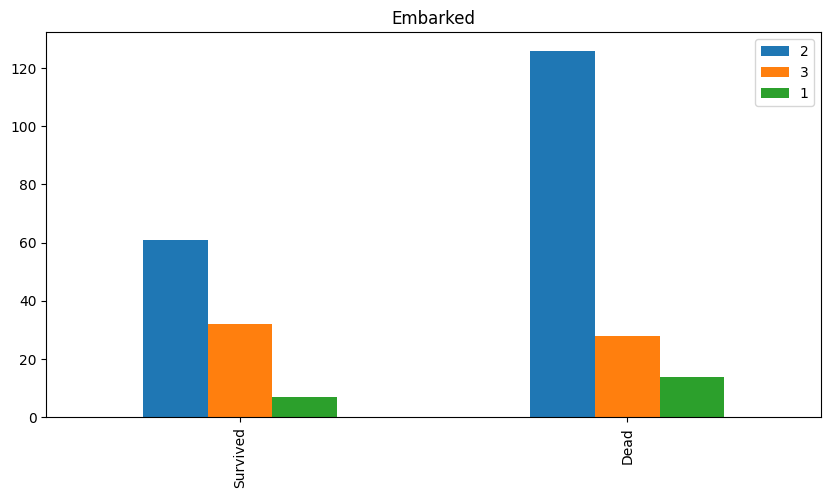

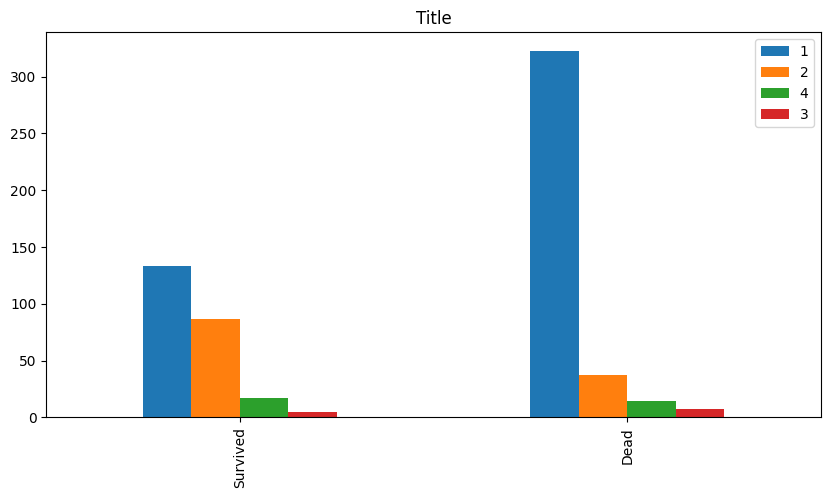

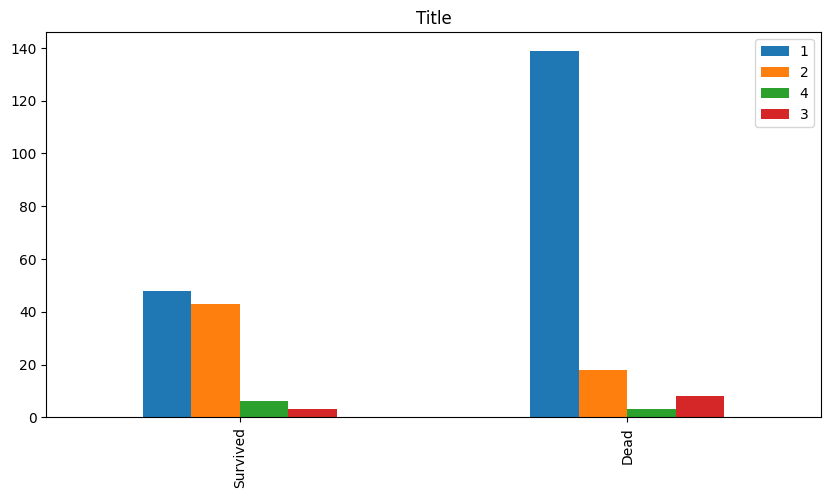

In [153]:
## categorical features
for i in categorical_features:
    for j in [df_train,df_test]:
        barplot(i,j)

In [154]:
for j in [df_train,df_test,test]:
    print(j['Cabin'].unique())
    print(j['Cabin'].value_counts())

['E' 'D' nan 'B' 'C' 'A' 'F' 'G' 'T']
C    42
B    31
E    27
D    26
A    14
F     9
G     2
T     1
Name: Cabin, dtype: int64
[nan 'B' 'C' 'E' 'D' 'F' 'G' 'A']
C    17
B    16
D     7
E     5
F     4
G     2
A     1
Name: Cabin, dtype: int64
[nan 'B' 'E' 'A' 'C' 'D' 'F' 'G']
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64


In [155]:
# Cabin
for j in [df_train,df_test,test]:
    j['Cabin']=j['Cabin'].replace({'A':3,'B':7,'C':6,'D':4,'E':5,'F':2,'G':1,'T':np.nan})

In [156]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
857,2,1,51.0,1,3,26.5500,5.0,2.0,1,1
52,2,2,49.0,3,3,76.7292,4.0,3.0,1,1
386,1,1,16.0,1,2,46.9000,NaN,2.0,4,0
124,2,1,54.0,1,2,77.2875,4.0,2.0,1,0
578,1,2,NaN,3,3,14.4583,NaN,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...
835,2,2,39.0,3,2,77.2875,5.0,3.0,2,1
192,1,2,19.0,3,3,7.8542,NaN,2.0,2,1
629,1,1,NaN,1,3,7.7333,NaN,1.0,1,0
559,1,2,36.0,3,3,17.4000,NaN,2.0,1,1


In [157]:
# missing value
def missing_table():
    global df_train,df_test,target,missing_train,missing_test
    miss_train,miss_test=df_train.copy(),df_test.copy()
    missing_train,missing_test=pd.DataFrame(),pd.DataFrame()
    missing_train['Total'] = miss_train.isnull().sum().sort_values(ascending = False)
    missing_test['Total'] = miss_test.isnull().sum().sort_values(ascending = False)
    missing_train['Percentage of Missing Values'] = (miss_train.isnull().mean()*100).sort_values(ascending = False)  
    missing_test['Percentage of Missing Values'] = (miss_test.isnull().mean()*100).sort_values(ascending = False)   
    missing_train['Type'] = miss_train[missing_train.index].dtypes
    missing_test['Type'] = miss_test[missing_test.index].dtypes
    missing_train=missing_train[missing_train['Percentage of Missing Values']>0]
    missing_test=missing_test[missing_test['Percentage of Missing Values']>0]

In [158]:
missing_table()

In [159]:
missing_train

,Total,Percentage of Missing Values,Type
Cabin,472,75.762440,float64
Age,121,19.422151,float64
Embarked,2,0.321027,float64


In [160]:
missing_test

,Total,Percentage of Missing Values,Type
Cabin,216,80.597015,float64
Age,56,20.895522,float64


In [161]:
# 결과 테이블
cols = ['Model','ROC Score', 'Precision Score', 'Recall Score','Train dataset Accuracy Score','Test dataset Accuracy Score','Kappa Score']
result = pd.DataFrame(columns = cols)

In [162]:
from sklearn.metrics import classification_report,roc_auc_score,precision_score,recall_score,accuracy_score,cohen_kappa_score,roc_curve
def model_built1():
    global df_train,df_test,x_train,x_test,y_train,y_test
    x_train,y_train=df_train.drop(target,axis=1).copy(),df_train[target].copy()
    x_test,y_test=df_test.drop(target,axis=1).copy(),df_test[target].copy()

In [163]:
model_built1()

In [164]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors= 21)
pipeline1=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',GradientBoostingClassifier())])
#pipeline2=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',SGDClassifier())])

In [165]:
pipeline1.fit(x_train,y_train)

Pipeline(steps=[('a', KNNImputer(n_neighbors=21)), ('s', VarianceThreshold()),
                ('mm', GradientBoostingClassifier())])

In [166]:
y_pred=pipeline1.predict(x_test)

In [167]:
np.unique(y_pred)

array([0, 1])

In [168]:
for i in np.arange(0.5,.9,.01):
    print(i)

0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.5900000000000001
0.6000000000000001
0.6100000000000001
0.6200000000000001
0.6300000000000001
0.6400000000000001
0.6500000000000001
0.6600000000000001
0.6700000000000002
0.6800000000000002
0.6900000000000002
0.7000000000000002
0.7100000000000002
0.7200000000000002
0.7300000000000002
0.7400000000000002
0.7500000000000002
0.7600000000000002
0.7700000000000002
0.7800000000000002
0.7900000000000003
0.8000000000000003
0.8100000000000003
0.8200000000000003
0.8300000000000003
0.8400000000000003
0.8500000000000003
0.8600000000000003
0.8700000000000003
0.8800000000000003
0.8900000000000003


In [169]:
pipeline1

Pipeline(steps=[('a', KNNImputer(n_neighbors=21)), ('s', VarianceThreshold()),
                ('mm', GradientBoostingClassifier())])

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors= 21)

In [171]:
y_pred=pipeline1.predict(x_test)

In [172]:
# KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 9)
impute_with_train = imputer.fit_transform(x_train)
impute_with_test = imputer.fit_transform(x_test)

In [173]:
def result_table(model_name):
    global model,x_train,x_test,y_test,y_train,y_pred,result,model
    tmp1 = pd.Series({'Model': model_name,
                     'ROC Score' : roc_auc_score(y_test, y_pred),
                     'Precision Score': precision_score(y_test, y_pred),
                     'Recall Score': recall_score(y_test, y_pred),
                     'Train dataset Accuracy Score': model.score(x_train,y_train),
                     'Test dataset Accuracy Score': accuracy_score(y_test, y_pred),
                     'Kappa Score': cohen_kappa_score(y_test, y_pred)})
    result = result.append(tmp1, ignore_index = True)
    #Ploting ROC Curve
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    return result

In [174]:
model=pipeline1

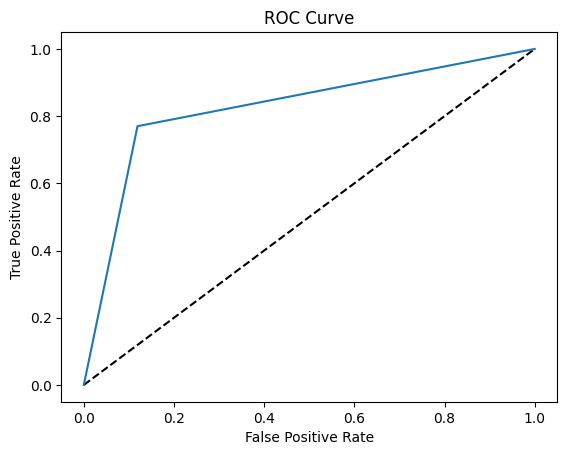

,Model,ROC Score,Precision Score,Recall Score,Train dataset Accuracy Score,Test dataset Accuracy Score,Kappa Score
0,GBoost,0.825476,0.793814,0.77,0.921348,0.839552,0.654929


In [175]:
result_table(model_name='GBoost')

In [176]:
impute=IterativeImputer(imputation_order='random',max_iter=21)
pipeline2=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',GradientBoostingClassifier())])
pipeline2.fit(x_train,y_train)
y_pred=pipeline2.predict(x_test)

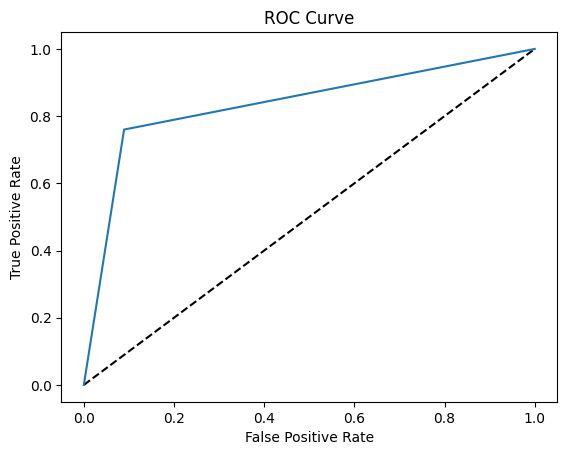

,Model,ROC Score,Precision Score,Recall Score,Train dataset Accuracy Score,Test dataset Accuracy Score,Kappa Score
0,GBoost,0.825476,0.793814,0.77,0.921348,0.839552,0.654929
1,GBoost,0.835357,0.835165,0.76,0.918138,0.854478,0.683158


In [177]:
model=pipeline2
result_table(model_name='GBoost')

In [178]:
final_pred=pipeline1.predict(test)

In [179]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

impute=IterativeImputer(imputation_order='random',max_iter=21)
pipeline=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',GradientBoostingClassifier())])

pipeline.fit(x_train,y_train)

Pipeline(steps=[('a', IterativeImputer(imputation_order='random', max_iter=21)),
                ('s', VarianceThreshold()),
                ('mm', GradientBoostingClassifier())])

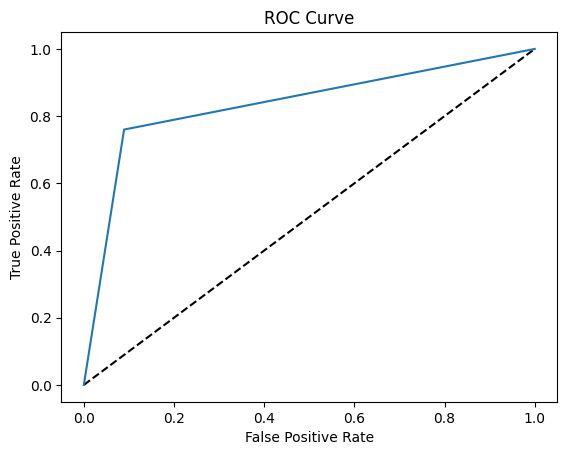

,Model,ROC Score,Precision Score,Recall Score,Train dataset Accuracy Score,Test dataset Accuracy Score,Kappa Score
0,GBoost,0.825476,0.793814,0.77,0.921348,0.839552,0.654929
1,GBoost,0.835357,0.835165,0.76,0.918138,0.854478,0.683158
2,GBoost,0.835357,0.835165,0.76,0.916533,0.854478,0.683158


In [180]:
model=pipeline
result_table(model_name='GBoost')

In [181]:
for i in [x_train,x_test,test]:
    i.drop('Cabin',axis=1,inplace=True)

In [182]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

impute=IterativeImputer(imputation_order='random',max_iter=21)
pipeline=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',GradientBoostingClassifier())])

pipeline.fit(x_train,y_train)

Pipeline(steps=[('a', IterativeImputer(imputation_order='random', max_iter=21)),
                ('s', VarianceThreshold()),
                ('mm', GradientBoostingClassifier())])

In [183]:
y_pred=pipeline.predict(x_test)

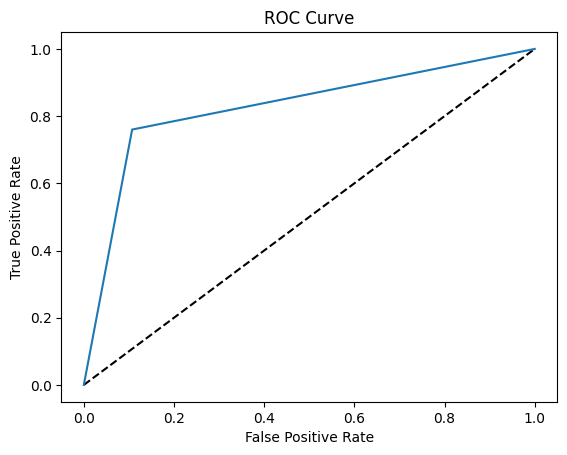

,Model,ROC Score,Precision Score,Recall Score,Train dataset Accuracy Score,Test dataset Accuracy Score,Kappa Score
0,GBoost,0.825476,0.793814,0.77,0.921348,0.839552,0.654929
1,GBoost,0.835357,0.835165,0.76,0.918138,0.854478,0.683158
2,GBoost,0.835357,0.835165,0.76,0.916533,0.854478,0.683158
3,GBoost,0.826429,0.808511,0.76,0.910112,0.843284,0.660882


In [184]:
model=pipeline
result_table(model_name='GBoost')

In [185]:
mmo = {897:1,899:1,930:1,932:1,949:1,987:1,995:1,998:1,999:1,1016:1,1047:1,1083:1,1097:1,1099:1,1103:1,1115:1,1118:1,1135:1,1143:1,1152:1,1153:1,1171:1,1182:1,1192:1,1203:1,1233:1,1250:1,1264:1,1286:1,935:0,957:0,972:0,988:0,1004:0,1006:0,1011:0,1105:0,1130:0,1138:0,1173:0,1284:0}

In [186]:
final_pred=pipeline.predict(test)
submission=pd.read_csv('../data/titanic_test.csv',usecols=['PassengerId'])
submission['Survived']=final_pred
submission['Survived'] = submission['Survived'].apply(lambda x: 1 if x>0.8 else 0)
submission['Survived'] = submission.apply(lambda r: mmo[int(r['PassengerId'])] if int(r['PassengerId']) in mmo else r['Survived'], axis=1)

In [190]:
submission.to_csv('../data/submission7.csv',index=False)